In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

In [2]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM base_quadra
'''

df = pd.read_sql(query, con = conn)

cur.close()
conn.close()

df.head()

,tipo,rua,CEP,cidade,estado,alugada,telefone,estrelas,valor_hora,horario_abertura,horario_fechamento,descricao
0,Vôlei,Viaduto João Gabriel Pinto,97342-658,Vieira,PA,0,21 3197-9558,1,43,8,16,Cerveja gelada
1,Futsal,Lagoa Dias,19286197,Ramos dos Dourados,SP,1,+55 31 1446 9531,0,7,8,17,Cerveja gelada
2,Futsal,Passarela das Neves,77459-359,Fogaça,RO,0,(061) 6147 6958,3,15,11,16,Cerveja gelada
3,Vôlei,Estação Davi Lucas Viana,85868269,Nogueira,PB,1,+55 (061) 1002-8002,4,31,9,16,Localização ótima
4,Basquete,Setor Nunes,36396214,Monteiro de Martins,MA,1,+55 (081) 5686 7143,0,14,7,19,Espaço fechado


In [3]:
flt = df[['estado', 'descricao', 'estrelas', 'valor_hora', 'tipo']]
agrupado = flt.groupby(['estado']).mean().reset_index()
agrupado.head(10)

,estado,estrelas,valor_hora
0,AC,2.636364,26.909091
1,AL,4.000000,21.571429
2,AM,3.000000,26.200000
3,AP,1.750000,21.750000
4,BA,3.571429,33.142857
5,CE,1.636364,21.545455
6,DF,2.666667,31.444444
7,ES,2.400000,28.200000
8,GO,2.230769,29.307692
9,MA,2.000000,24.500000


[Text(0.5, 1.0, 'Valor médio da hora do aluguel de quadras por estado'),
 Text(0.5, 0, 'Valor médio'),
 Text(0, 0.5, 'Estado')]

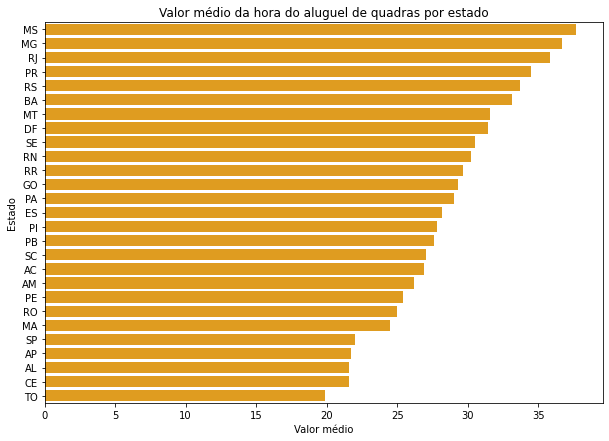

In [167]:
fig, ax = plt.subplots(figsize = (10, 7))

sns.barplot(data = agrupado.sort_values(by = 'valor_hora', ascending = False),
            y = 'estado', x = 'valor_hora',
            color = 'orange',
            ax = ax)

ax.set(title = "Valor médio da hora do aluguel de quadras por estado",
       xlabel = "Valor médio",
       ylabel = "Estado")

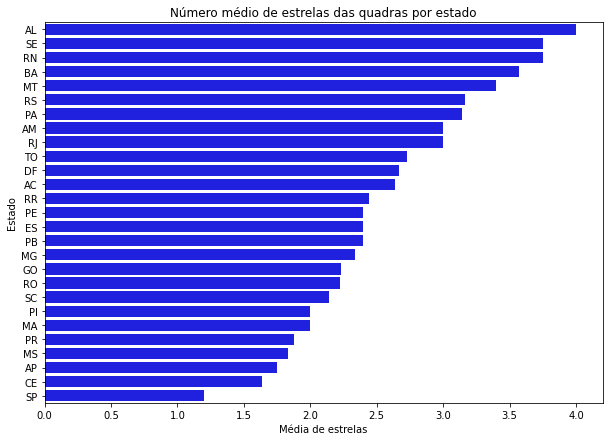

In [166]:
fig, ax = plt.subplots(figsize = (10, 7))

sns.barplot(data = agrupado.sort_values(by = 'estrelas', ascending = False),
            y = 'estado', x = 'estrelas',
            color = 'blue',
            ax = ax)

ax.set_title('Número médio de estrelas das quadras por estado')

ax.set(title = "Número médio de estrelas das quadras por estado",
       xlabel = "Média de estrelas",
       ylabel = "Estado")

plt.show()

In [56]:
df.head()

,tipo,rua,CEP,cidade,estado,alugada,telefone,estrelas,valor_hora,horario_abertura,horario_fechamento,descricao
0,Vôlei,Viaduto João Gabriel Pinto,97342-658,Vieira,PA,0,21 3197-9558,1,43,8,16,Cerveja gelada
1,Futsal,Lagoa Dias,19286197,Ramos dos Dourados,SP,1,+55 31 1446 9531,0,7,8,17,Cerveja gelada
2,Futsal,Passarela das Neves,77459-359,Fogaça,RO,0,(061) 6147 6958,3,15,11,16,Cerveja gelada
3,Vôlei,Estação Davi Lucas Viana,85868269,Nogueira,PB,1,+55 (061) 1002-8002,4,31,9,16,Localização ótima
4,Basquete,Setor Nunes,36396214,Monteiro de Martins,MA,1,+55 (081) 5686 7143,0,14,7,19,Espaço fechado


In [64]:
flt.head(10)

,estado,descricao,estrelas,valor_hora,tipo
0,PA,Cerveja gelada,1,43,Vôlei
1,SP,Cerveja gelada,0,7,Futsal
2,RO,Cerveja gelada,3,15,Futsal
3,PB,Localização ótima,4,31,Vôlei
4,MA,Espaço fechado,0,14,Basquete
5,PB,Com churrasqueira,2,26,Basquete
6,PA,Cerveja gelada,5,9,Futebol
7,PA,Bom custo-benefício,4,39,Vôlei
8,GO,Localização ótima,5,36,Futebol
9,MG,Bom custo-benefício,5,26,Handebol


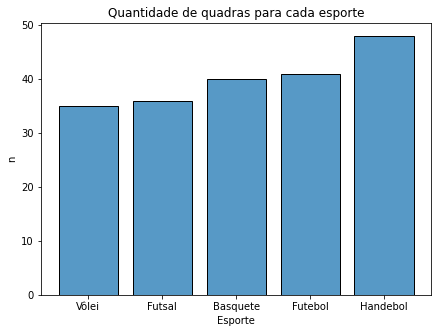

In [144]:
fig, ax = plt.subplots(figsize = (7, 5))

sns.histplot(data = flt, 
             x = 'tipo',
             shrink = 0.8,
             ax = ax)

ax.set(title = "Quantidade de quadras para cada esporte",
       xlabel = "Esporte",
       ylabel = "n")

plt.show()

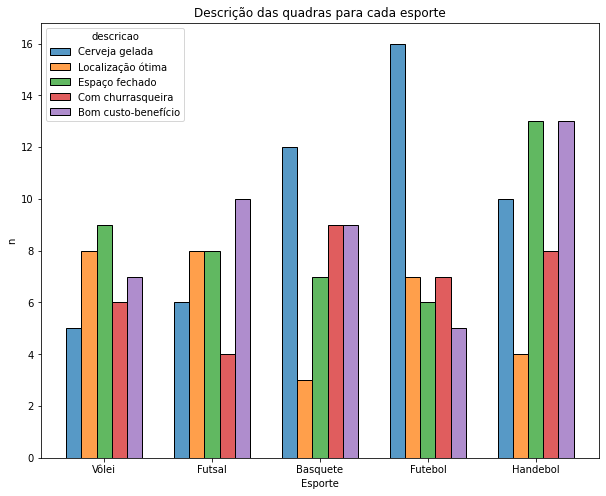

In [157]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.histplot(data = flt, 
             x = 'tipo', hue = 'descricao',
             shrink = 0.7,
             multiple = 'dodge',
             ax = ax)

ax.set(title = "Descrição das quadras para cada esporte",
       xlabel = "Esporte",
       ylabel = "n")

plt.show()